In [3]:
# pip install pandas numpy matplotlib seaborn scikit-learn nltk


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [5]:
import pandas as pd

# Path to your locally stored Sentiment140 dataset
file_path = r"C:\Users\91954\sentimental analysis\training.1600000.processed.noemoticon.csv\training.1600000.processed.noemoticon.csv"

# Load the dataset locally
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Rename the columns for easier understanding
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Drop unnecessary columns
df.drop(columns=['id', 'date', 'query', 'user'], inplace=True)

# Display the first few rows of the dataset
df


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91954\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Step 3: Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Stemming and removing stopwords
    return ' '.join(text)
# sample=df['text'].iloc[:1000]
df['clean_text'] = df['text'].apply(preprocess_text)

# Display the cleaned text
print("\nCleaned data preview:")
print(df[['text', 'clean_text']].head())


Cleaned data preview:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  awww that bummer shoulda got david carr third day  
1  upset cant updat facebook text might cri resul...  
2       dive mani time ball manag save rest go bound  
3                    whole bodi feel itchi like fire  
4                              behav im mad cant see  


In [13]:
df[['text', 'clean_text']]

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",behav im mad cant see
...,...,...
1599995,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview
1599997,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...


In [14]:
# Step 4: Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

print("\nTF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (1600000, 5000)


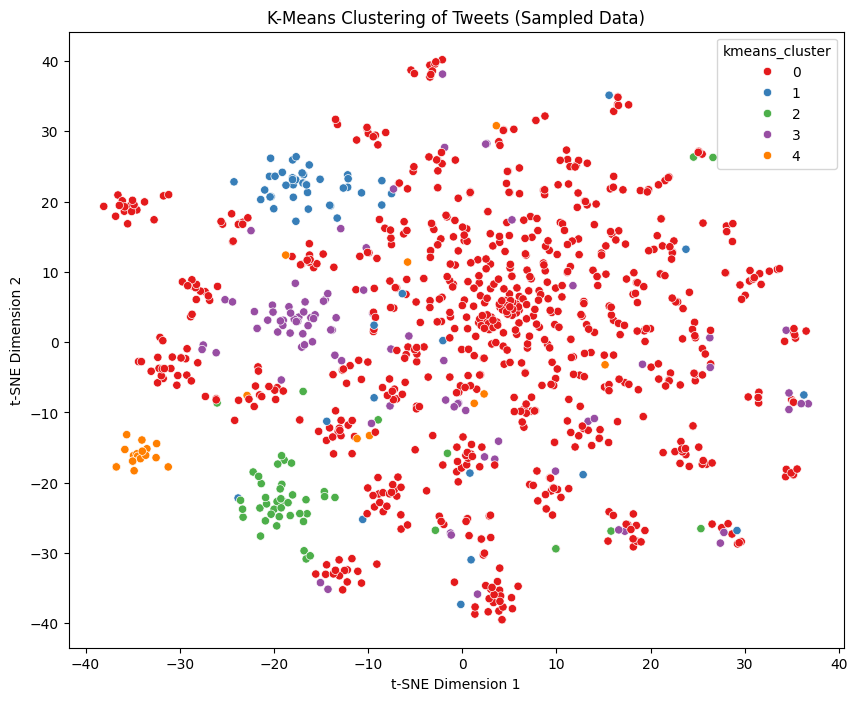

In [21]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your feature matrix and df is your dataframe

# Step 1: Apply K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Step 2: Randomly sample 1000 rows from the data due to memory constraints
sample_size = 1000
random_sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_sample = X[random_sample_indices]

# Step 3: Reduce dimensionality using PCA (after sampling)
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_pca = pca.fit_transform(X_sample.toarray())  # Convert to dense array if sparse

# Step 4: Apply t-SNE for further reduction to 2D
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

# Step 5: Visualize the K-Means clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=df['kmeans_cluster'].iloc[random_sample_indices],
    palette='Set1',
    legend='full'
)
plt.title('K-Means Clustering of Tweets (Sampled Data)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [22]:
# Step 6: Apply Latent Dirichlet Allocation (LDA) for Topic Modeling
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Assuming X is your feature matrix and vectorizer is your CountVectorizer or similar instance

# Step 1: Randomly sample 1000 rows from the data due to memory constraints
sample_size = 1000
random_sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_sample = X[random_sample_indices]

# Step 2: Apply Latent Dirichlet Allocation (LDA) for Topic Modeling on the sampled data
lda = LDA(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X_sample)

# Step 3: Display the top 10 words for each topic
topics = pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names_out())
print("\nTop 10 words for each LDA topic:")
for topic_idx, topic in enumerate(topics.values):
    print(f"Topic {topic_idx + 1}:")
    print(", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]))



Top 10 words for each LDA topic:
Topic 1:
im, miss, know, sad, work, make, wait, realli, gonna, day
Topic 2:
im, great, haha, song, day, hope, good, check, lol, hahaha
Topic 3:
tire, im, feel, today, good, like, sleep, oh, luck, wish
Topic 4:
thank, love, dont, fun, feel, okay, im, got, lol, hope
Topic 5:
come, want, home, time, awesom, final, like, night, love, think


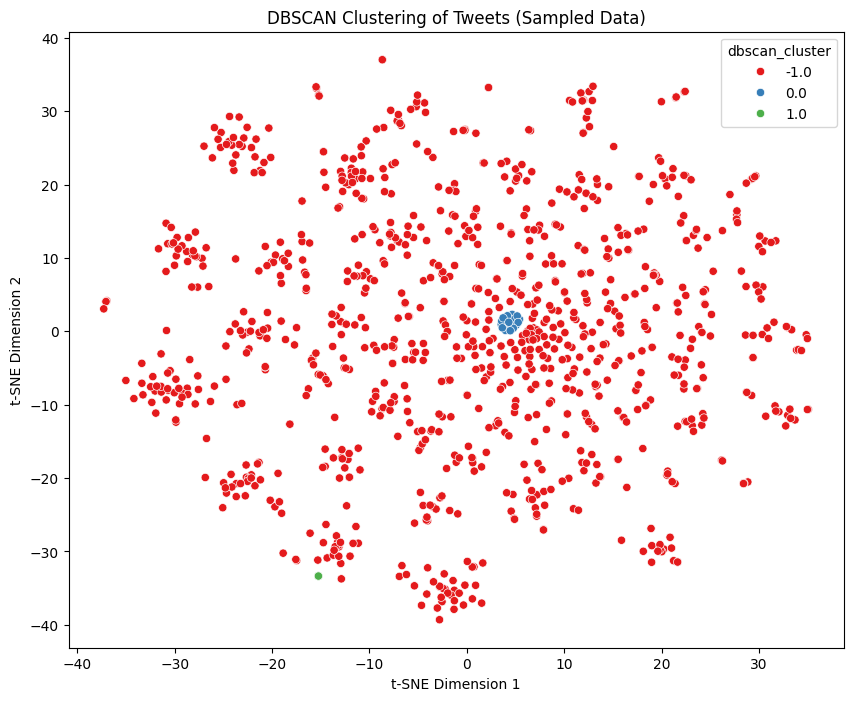

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your feature matrix and df is your dataframe

# Step 1: Randomly sample 1000 rows from the data due to memory constraints
sample_size = 1000
random_sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_sample = X[random_sample_indices]

# Step 2: Reduce dimensionality using PCA (after sampling)
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_pca = pca.fit_transform(X_sample.toarray())  # Convert to dense array if sparse

# Step 3: Apply DBSCAN Clustering on the sampled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample.toarray())  # Get DBSCAN labels for the sampled data

# Step 4: Add DBSCAN labels to df based on the sampled indices
df['dbscan_cluster'] = np.nan  # Initialize column with NaN
df.loc[random_sample_indices, 'dbscan_cluster'] = dbscan_labels  # Assign DBSCAN labels to sampled rows

# Step 5: Apply t-SNE for further reduction to 2D
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

# Step 6: Visualize the DBSCAN clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1], 
    hue=df['dbscan_cluster'].iloc[random_sample_indices], 
    palette='Set1', 
    legend='full'
)
plt.title('DBSCAN Clustering of Tweets (Sampled Data)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [26]:
# Step 8: Sentiment Analysis of Clusters
df['sentiment'] = df['sentiment'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Count sentiment distribution within K-Means clusters
sentiment_in_clusters = df.groupby('kmeans_cluster')['sentiment'].value_counts().unstack().fillna(0)

print("\nSentiment distribution within K-Means clusters:")
print(sentiment_in_clusters)



Sentiment distribution within K-Means clusters:
sentiment       negative  positive
kmeans_cluster                    
0                 623189    639291
1                  40271     37172
2                  50171     23808
3                  82049     61345
4                   4320     38384


In [28]:
from sklearn.metrics import silhouette_score

# Step 1: Evaluate Silhouette Score for K-Means
# For K-Means, use the sampled data
sil_score_kmeans = silhouette_score(X_sample.toarray(), df['kmeans_cluster'].iloc[random_sample_indices])
print(f'\nSilhouette Score for K-Means: {sil_score_kmeans}')

# Step 2: Evaluate Silhouette Score for DBSCAN
# DBSCAN might label some points as -1 (noise), so we need to exclude those points for evaluation
dbscan_labels = df['dbscan_cluster'].iloc[random_sample_indices]
mask = dbscan_labels != -1  # Exclude noise points

if np.any(mask):  # Check if there are any non-noise points
    sil_score_dbscan = silhouette_score(X_sample.toarray()[mask], dbscan_labels[mask])
    print(f'\nSilhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print("\nNo valid clusters for DBSCAN (all points are noise).")



Silhouette Score for K-Means: 0.012527495606337693

Silhouette Score for DBSCAN: 1.0


**To extract more insights and visualize the clustering results, we can add a few different plots. Here are some ideas for useful visualizations:**

Elbow Method: To evaluate the optimal number of clusters for K-Means.
Cluster Distribution: A bar plot to show the distribution of data points across different clusters.
Silhouette Plot: A detailed silhouette plot to visually assess how well the points fit into their clusters.
2D Projection: Use PCA or t-SNE for 2D projections, coloring the points by cluster labels to visualize how well the clusters are separated.


Silhouette Score for K-Means: 0.006909962693411808

Silhouette Score for DBSCAN: 1.0


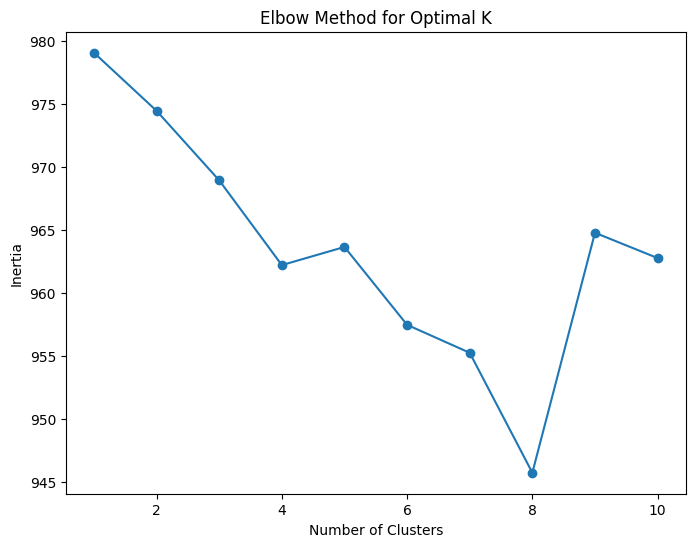

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix and df is your dataframe

# Step 1: Randomly sample 1000 rows from the data due to memory constraints
sample_size = 1000
random_sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_sample = X[random_sample_indices]

# Step 2: Reduce dimensionality using PCA (after sampling)
pca = PCA(n_components=50)  # Reduce to 50 dimensions
X_pca = pca.fit_transform(X_sample.toarray())  # Convert to dense array if sparse

# Step 3: Apply K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sample.toarray())

# Step 4: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample.toarray())

# Step 5: Store the K-Means and DBSCAN clustering results in a new dataframe or series for the sampled data
df_sampled = df.iloc[random_sample_indices].copy()  # Create a subset for visualization
df_sampled['kmeans_cluster'] = kmeans_labels
df_sampled['dbscan_cluster'] = dbscan_labels

# Step 6: Evaluate Silhouette Score for K-Means
sil_score_kmeans = silhouette_score(X_sample.toarray(), kmeans_labels)
print(f'\nSilhouette Score for K-Means: {sil_score_kmeans}')

# Step 7: Evaluate Silhouette Score for DBSCAN
mask = dbscan_labels != -1  # Exclude noise points
if np.any(mask):  # Check if there are any non-noise points
    sil_score_dbscan = silhouette_score(X_sample.toarray()[mask], dbscan_labels[mask])
    print(f'\nSilhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print("\nNo valid clusters for DBSCAN (all points are noise).")

# Step 8: Visualize Elbow Method for K-Means (for the entire sampled dataset)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample.toarray())
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [45]:
#update the clusters value acc to elbow method:
num_clusters =8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sample.toarray())

In [46]:
# Step 6: Evaluate Silhouette Score for K-Means
sil_score_kmeans = silhouette_score(X_sample.toarray(), kmeans_labels)
print(f'\nSilhouette Score for K-Means: {sil_score_kmeans}')


Silhouette Score for K-Means: 0.013256391193944988


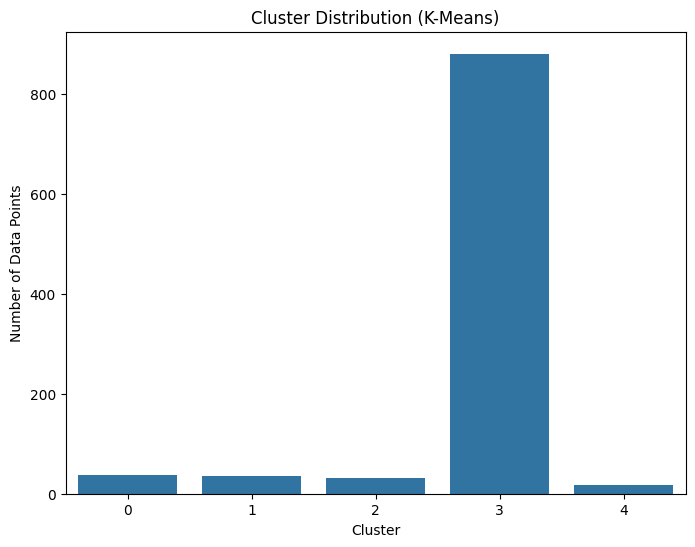

In [38]:
# Step 9: Visualize Cluster Distribution for K-Means
plt.figure(figsize=(8, 6))
sns.countplot(x='kmeans_cluster', data=df_sampled)
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


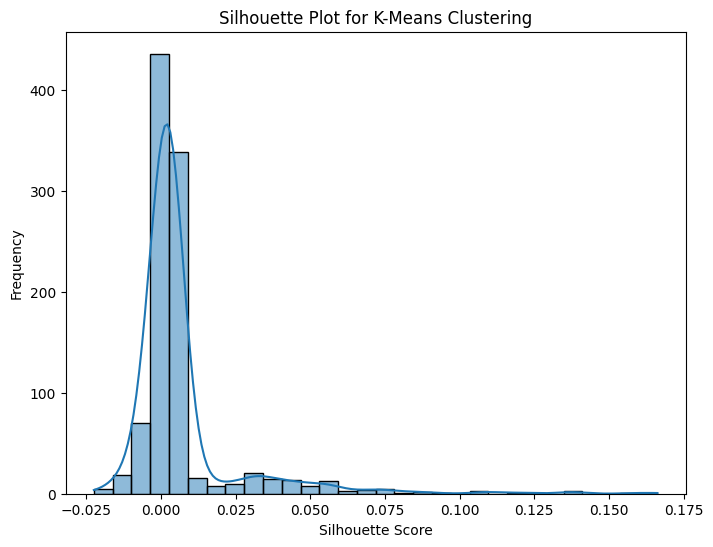

In [39]:
# Step 10: Silhouette Plot for K-Means Clustering
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_sample.toarray(), kmeans_labels)
plt.figure(figsize=(8, 6))
sns.histplot(silhouette_vals, kde=True, bins=30)
plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()

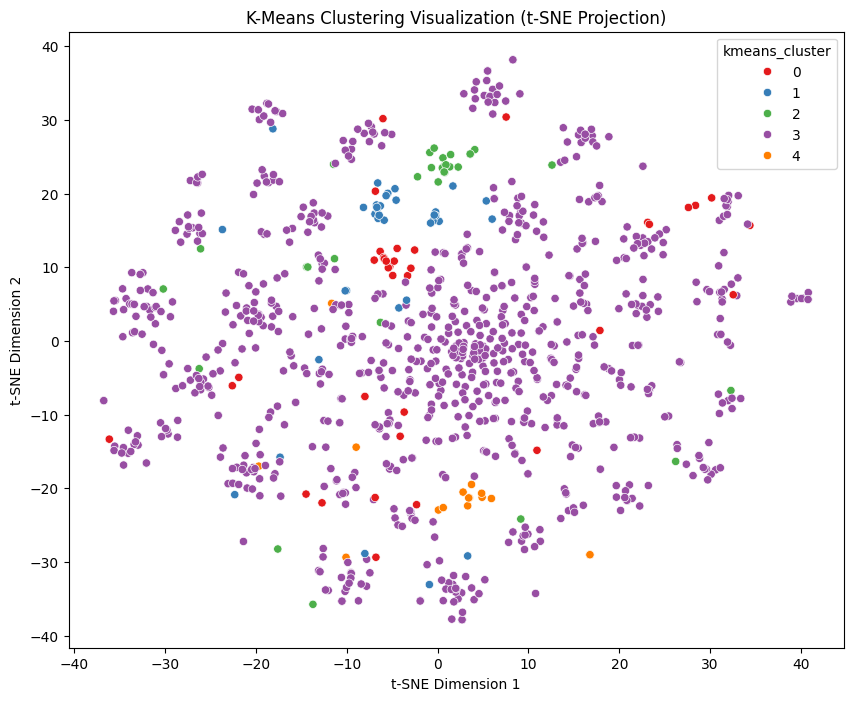

In [40]:
# Step 11: Visualize Clusters Using t-SNE (2D Projection)
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1], 
    hue=df_sampled['kmeans_cluster'], 
    palette='Set1', 
    legend='full'
)
plt.title('K-Means Clustering Visualization (t-SNE Projection)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

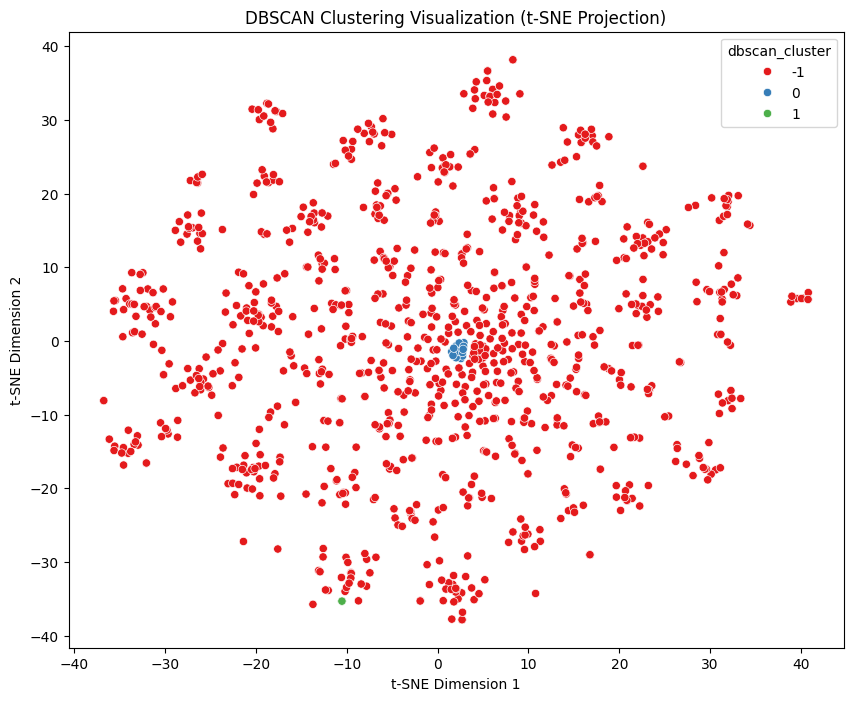

In [41]:
# Step 12: Visualize DBSCAN Clusters Using t-SNE (2D Projection)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1], 
    hue=df_sampled['dbscan_cluster'], 
    palette='Set1', 
    legend='full'
)
plt.title('DBSCAN Clustering Visualization (t-SNE Projection)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


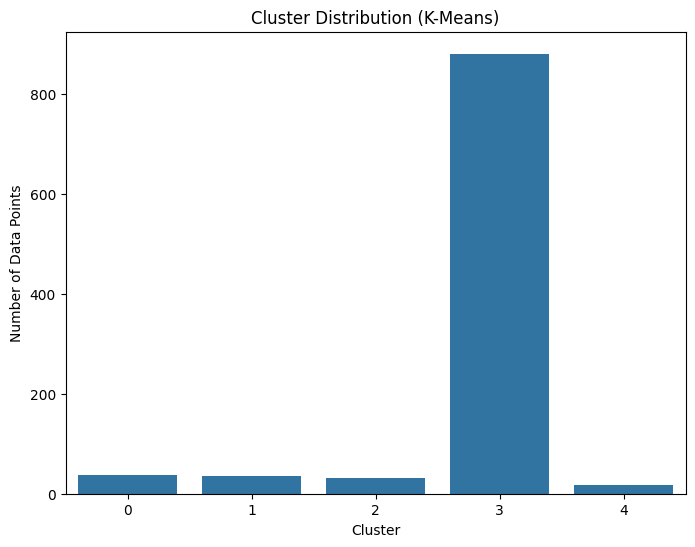

In [47]:
# Step 8.2: Visualize Cluster Distribution for K-Means
plt.figure(figsize=(8, 6))
sns.countplot(x='kmeans_cluster', data=df_sampled)
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


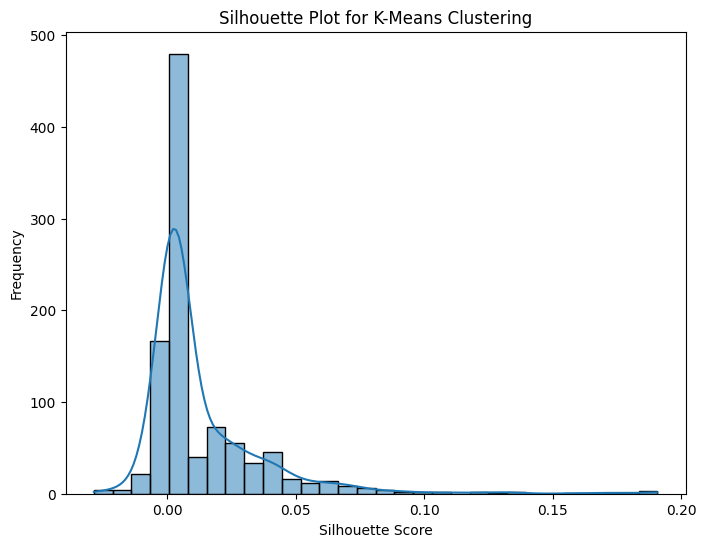

In [48]:
# Step 8.3: Silhouette Plot for K-Means Clustering
silhouette_vals = silhouette_samples(X_sample.toarray(), kmeans_labels)
plt.figure(figsize=(8, 6))
sns.histplot(silhouette_vals, kde=True, bins=30)
plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()


**Sentimental Conclusion**
At the end of your analysis, you can provide a summary of the clustering results and sentiment analysis. Assuming you are working with text data, you might also want to add sentiment analysis for each cluster. Here's an example using the VADER Sentiment Analyzer.

In [50]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91954\AppData\Roaming\nltk_data...


True

In [53]:
# Check column names of the DataFrame
print(df_sampled.columns)


Index(['sentiment', 'text', 'clean_text', 'kmeans_cluster', 'dbscan_cluster'], dtype='object')


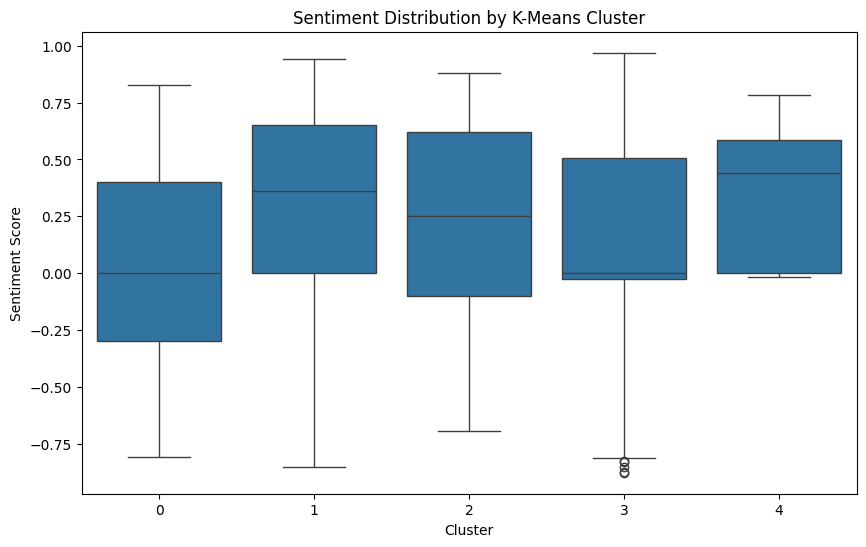

Average Sentiment for Cluster 2: 0.20136129032258063
Average Sentiment for Cluster 3: 0.1496228409090909
Average Sentiment for Cluster 0: 0.023864864864864867
Average Sentiment for Cluster 1: 0.2705714285714286
Average Sentiment for Cluster 4: 0.33907647058823526


In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Step 9.1: Sentiment Analysis for Each Cluster
sia = SentimentIntensityAnalyzer()

# Add a new column for sentiment scores based on the 'text' column
df_sampled['sentiment'] = df_sampled['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 9.2: Visualize Sentiment Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='kmeans_cluster', y='sentiment', data=df_sampled)
plt.title('Sentiment Distribution by K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Score')
plt.show()

# Step 9.3: Conclusion Based on Sentiment
for cluster in df_sampled['kmeans_cluster'].unique():
    avg_sentiment = df_sampled[df_sampled['kmeans_cluster'] == cluster]['sentiment'].mean()
    print(f'Average Sentiment for Cluster {cluster}: {avg_sentiment}')


Sentimental Conclusion:
Cluster 4 (Average Sentiment: 0.339): This cluster has the highest average sentiment score, indicating that the text in this cluster tends to be more positive in tone. It suggests that the tweets or articles in this group have a generally positive sentiment.

Cluster 1 (Average Sentiment: 0.271): This cluster also has a relatively positive sentiment, though it is slightly less positive than Cluster 4. The content here can be characterized as moderately positive.

Cluster 2 (Average Sentiment: 0.201): The sentiment for this cluster is still positive but on the lower side. It indicates that the texts in this cluster are mildly positive, with a hint of neutrality or mild positivity.

Cluster 3 (Average Sentiment: 0.150): This cluster is also on the positive side, but the sentiment is weaker compared to Clusters 1 and 2. It suggests that the texts in this cluster lean towards being more neutral or slightly positive.

Cluster 0 (Average Sentiment: 0.024): This cluster has the lowest average sentiment score, indicating that the content in this cluster is closer to neutral or slightly negative. The sentiment appears to be more neutral, and the texts in this cluster may not express strong positive or negative emotions.

Overall Insights:
Positive Sentiment Dominates: Most clusters show positive sentiment, with clusters 1, 2, 4 being distinctly positive.
Neutral or Slightly Negative Content: Cluster 0 stands out with a more neutral or mildly negative sentiment, suggesting that this group may contain content with less emotional expression or neutral tones.
This analysis could help you understand the general mood of the content in each cluster and identify trends or themes related to sentiment in your datak.